#### <img src="figs/logocimat.png" height="20%" width="20%"  align="center"/>

# <center> Ciencia de Datos<center>

<center> Víctor Muñiz Sánchez <center>
<center> Maestría en Cómputo Estadístico <center>
<center> Enero a junio 2021 <center>

# Sesión de ayudantía.

## Algunos aspectos de procesamiento de imágenes

In [47]:
%matplotlib inline
import skimage
print(skimage.__version__)
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from IPython.display import display
from scipy.ndimage import affine_transform, zoom
from scipy import misc

0.17.2


## Operaciones básicas de lectura y escritura

### Reading, saving, and displaying an image using PIL

(usaremos ésta librería para hacer varias operaciones sobre imágenes)

453 340 RGB PNG <class 'PIL.PngImagePlugin.PngImageFile'>


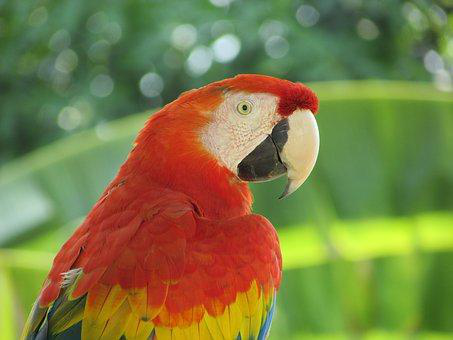

In [116]:
im = Image.open("../images/parrot.png") # read the image, provide the correct path
print(im.width, im.height, im.mode, im.format, type(im))
# 453 340 RGB PNG <class 'PIL.PngImagePlugin.PngImageFile'>
#im.show() # display the image (in window)
display(im)

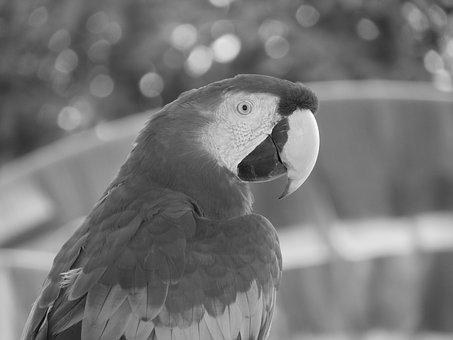

In [51]:
im_g = im.convert('L') # convert the RGB color image to a grayscale image
im_g.save('../images/parrot_gray.png') # save the image to disk
display(Image.open("../images/parrot_gray.png")) # read the grayscale image from disk and show


### Reading, saving, and displaying an image using Matplotlib

(960, 1280, 4) float32 <class 'numpy.ndarray'>


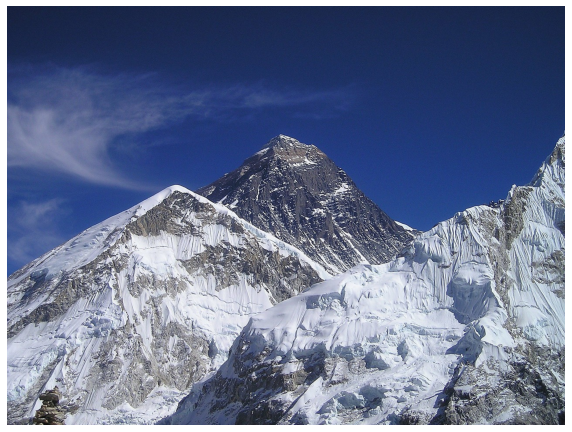

In [117]:
im = mpimg.imread("../images/hill.png") # read the image from disk as a numpy ndarray
print(im.shape, im.dtype, type(im)) # this image contains an α channel, hence num_channels= 4
# (960, 1280, 4) float32 <class 'numpy.ndarray'>
plt.figure(figsize=(10,10))
plt.imshow(im) # display the image
plt.axis('off')
plt.show()

In [118]:
type(im)

numpy.ndarray

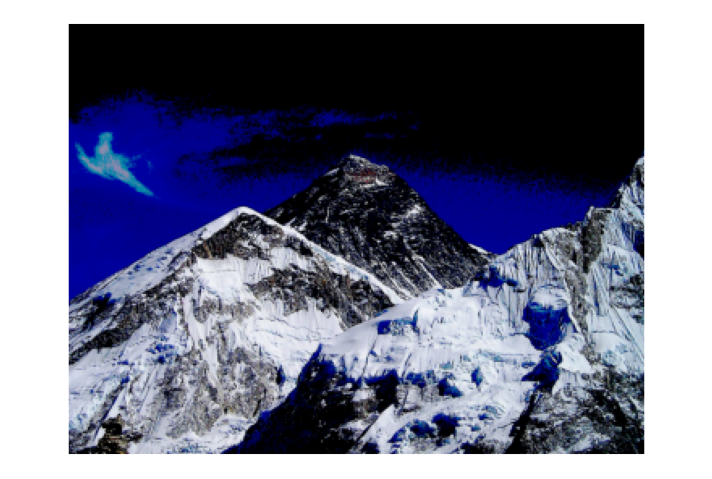

In [8]:
im1 = im
im1[im1 < 0.5] = 0 # make the image look darker
plt.imshow(im1)
plt.axis('off')
plt.tight_layout()
plt.savefig("../images/hill_dark.png") # save the dark image
plt.close()
im = mpimg.imread("../images/hill_dark.png") # read the dark image
plt.figure(figsize=(10,10))
plt.imshow(im)
plt.axis('off') # no axis ticks
plt.tight_layout()
plt.show()

### Reading, saving, and displaying an image using scikit-image

(340, 453, 3) uint8 <class 'numpy.ndarray'>


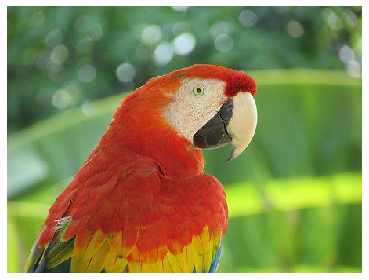

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x7f3fd3def820>, None)

In [53]:
im = imread("../images/parrot.png") # read image from disk, provide the correct path
print(im.shape, im.dtype, type(im))
plt.axis('off'), imshow(im), show()

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


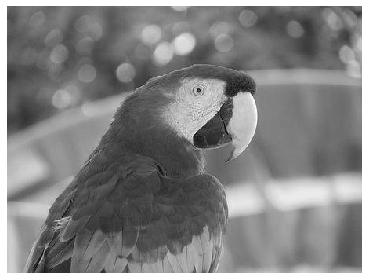

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x7f3fd3cd3700>, None)

In [55]:
im_gray = color.rgb2gray(im)
imsave('../images/parrot_gray_skimage.png', im_gray) # save image to disk
im = imread("../images/parrot_gray_skimage.png")
plt.axis('off'), imshow(im), show()

## Espacios de color

### RGB 

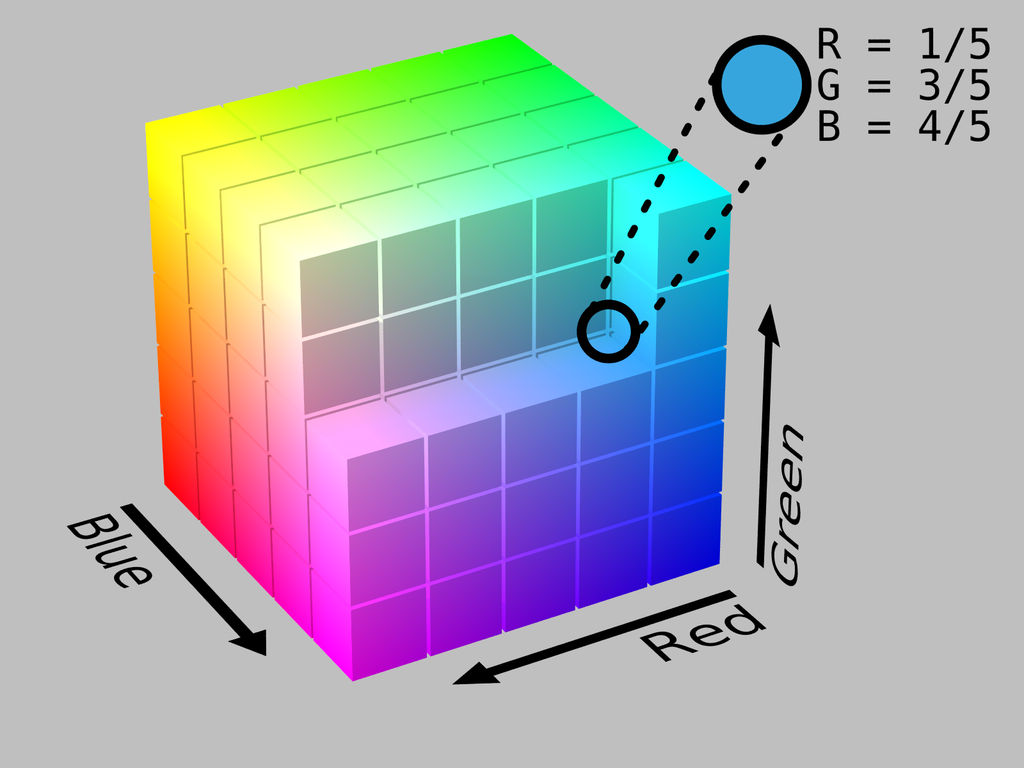

In [68]:
import IPython.display as ipd
ipd.Image("../images/RGB_Cube_Show_lowgamma_cutout_b.png", width=500)

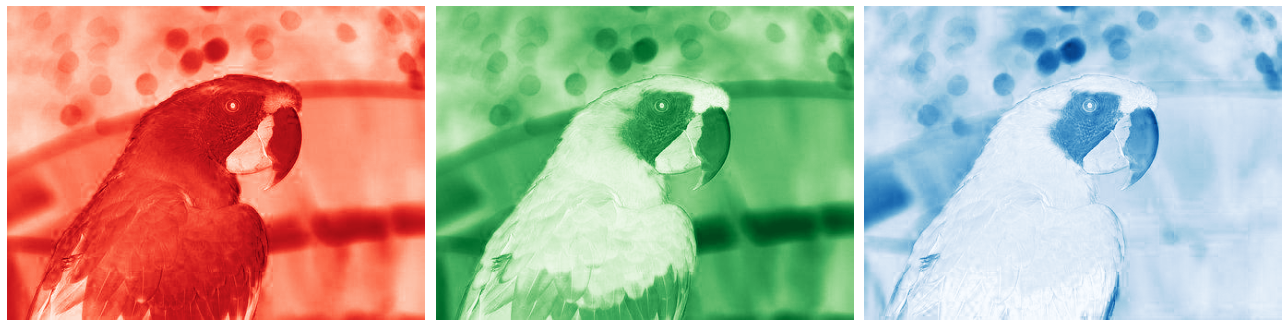

In [119]:
im = Image.open("../images/parrot.png")
ch_r, ch_g, ch_b = im.split() # split the RGB image into 3 channels: R, G and B
# we shall use matplotlib to display the channels
plt.figure(figsize=(18,6))
plt.subplot(1,3,1); plt.imshow(ch_r, cmap=plt.cm.Reds); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(ch_g, cmap=plt.cm.Greens); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(ch_b, cmap=plt.cm.Blues); plt.axis('off')
plt.tight_layout()
plt.show() # show the R, G, B channels

### Plotting the histograms of pixel values for the RGB channels of an image

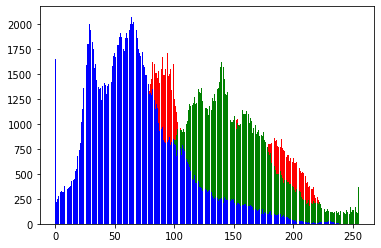

In [71]:
pl = im.histogram()
plt.bar(range(256), pl[:256], color='r')
plt.bar(range(256), pl[256:2*256], color='g')
plt.bar(range(256), pl[2*256:], color='b')
plt.show()

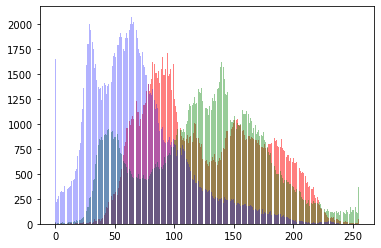

In [70]:
pl = im.histogram()
plt.bar(range(256), pl[:256], color='r', alpha=0.5)
plt.bar(range(256), pl[256:2*256], color='g', alpha=0.4)
plt.bar(range(256), pl[2*256:], color='b', alpha=0.3)
plt.show()

### HSV

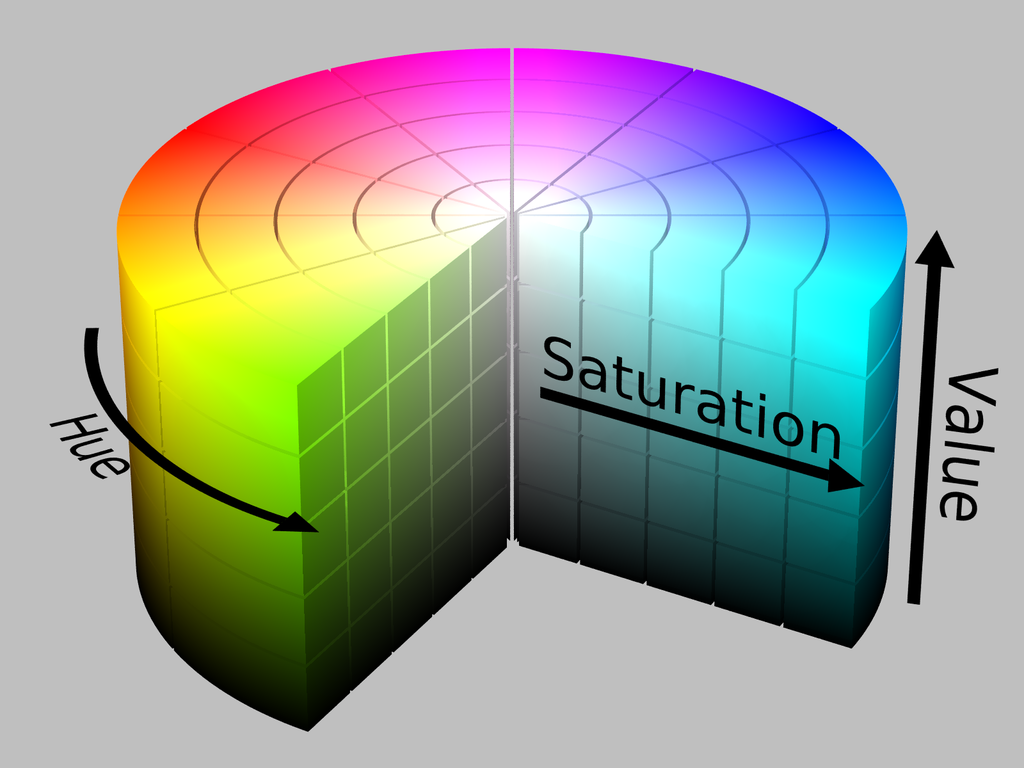

In [74]:
ipd.Image("../images/HSV_color_solid_cylinder_saturation_gray.png", width=500)

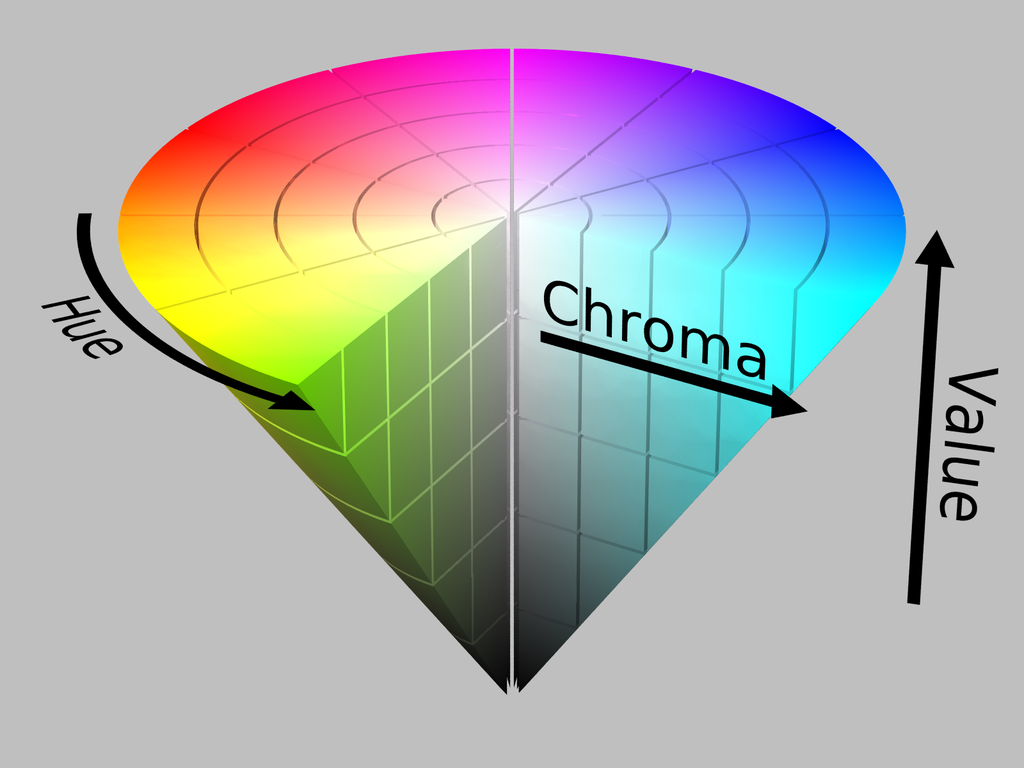

In [75]:
ipd.Image("../images/HSV_color_solid_cone_chroma_gray.png", width=500)

**HUE**: Hue is the color portion of the model, expressed as a number from 0 to 360 degrees:

- Red falls between 0 and 60 degrees.
- Yellow falls between 61 and 120 degrees.
- Green falls between 121 and 180 degrees.
- Cyan falls between 181 and 240 degrees.
- Blue falls between 241 and 300 degrees.
- Magenta falls between 301 and 360 degrees.

**SATURATION**: Saturation describes the amount of gray in a particular color, from 0 to 100 percent. Reducing this component toward zero introduces more gray and produces a faded effect. Sometimes, saturation appears as a range from 0 to 1, where 0 is gray, and 1 is a primary color.

**VALUE (OR BRIGHTNESS)**: Value works in conjunction with saturation and describes the brightness or intensity of the color, from 0 to 100 percent, where 0 is completely black, and 100 is the brightest and reveals the most color.

**CHROMA**: The colorfulness relative to the brightness of a similarly illuminated white. Equal to the range of the RGB values (saturation is equal to the chroma over the maximum chroma in that slice of the cone).

(340, 453, 3)

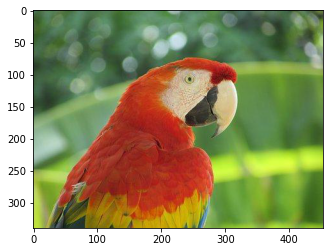

In [76]:
im = imread("../images/parrot.png")
plt.imshow(im)
im.shape

In [77]:
im_hsv = color.rgb2hsv(im)
im_hsv.shape

(340, 453, 3)

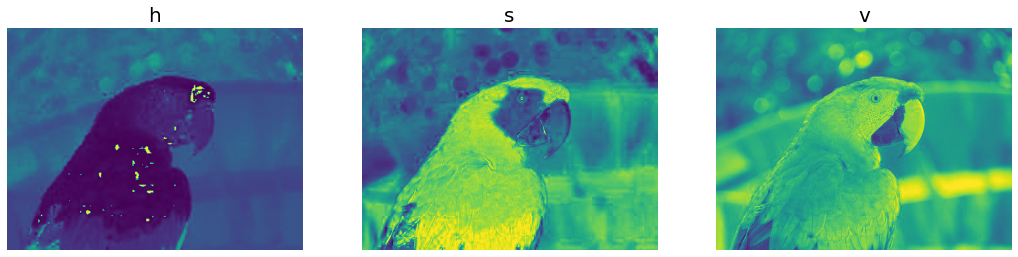

In [81]:
#plt.gray()
plt.figure(figsize=(18,6))
plt.subplot(131), plt.imshow(im_hsv[...,0]), plt.title('h', size=20),
plt.axis('off')
plt.subplot(132), plt.imshow(im_hsv[...,1]), plt.title('s', size=20),
plt.axis('off')
plt.subplot(133), plt.imshow(im_hsv[...,2]), plt.title('v', size=20),
plt.axis('off')
plt.show()

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(340, 453, 3) uint8 <class 'numpy.ndarray'>


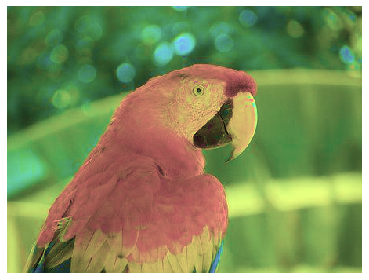

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x7f3fd30ac100>, None)

In [127]:
im = imread("../images/parrot.png") # read image from disk, provide the correct path
print(im.shape, im.dtype, type(im))
hsv = color.rgb2hsv(im) # from RGB to HSV color space
hsv[:, :, 1] = 0.5 # change the saturation
im1 = color.hsv2rgb(hsv) # from HSV back to RGB
imsave('../images/parrot_hsv.png', im1) # save image to disk
im = imread("../images/parrot_hsv.png")
plt.axis('off'), imshow(im), show()

### Converting image data structures

In [120]:
im0 = Image.open('../images/flowers.png') # read image into an Image object with PIL
print(im0.mode, im0.format)

RGBA PNG


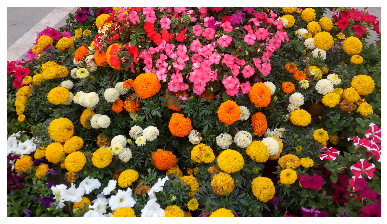

(2304, 4096, 4)

In [121]:
im = np.array(im0) # create a numpy ndarray from the Image object
imshow(im) # use skimage imshow to display the image
plt.axis('off'), show()
im.shape

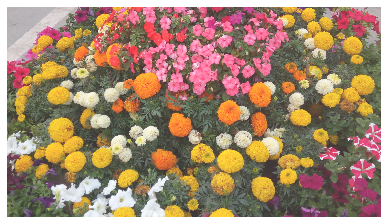

((-0.5, 4095.5, 2303.5, -0.5), None)

In [125]:
im[...,3]=200
imshow(im) # use skimage imshow to display the image
plt.axis('off'), show()

### Computing the basic statistics of an image

In [130]:
im = Image.open('../images/parrot.png')

In [131]:
s = stat.Stat(im)
print(s.extrema) # maximum and minimum pixel values for each channel R, G, B
print(s.count)
print(s.mean)
print(s.median)
print(s.stddev)

[(0, 255), (0, 255), (0, 253)]
[154020, 154020, 154020]
[125.41716010907675, 124.4158940397351, 68.46314764316323]
[117, 128, 63]
[47.763871467000165, 51.19863631276633, 39.29534599039047]


### Combining multiple channels of an image

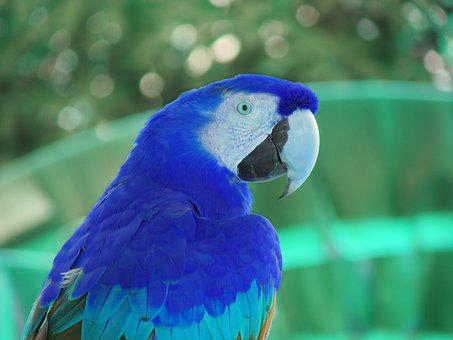

In [133]:
im = Image.merge('RGB', (ch_b, ch_g, ch_r)) # swap the red and blue channels obtained last time with split()
display(im)

### α-blending two images

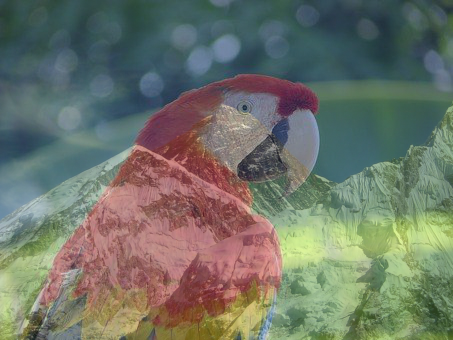

In [137]:
im1 = Image.open("../images/parrot.png")
im2 = Image.open("../images/hill.png")
im1 = im1.convert('RGBA') # two images have different modes, must be converted to the same mode
im2 = im2.resize((im1.width, im1.height), Image.BILINEAR) # two images have different sizes, must be converted to the same size
im = display(Image.blend(im1, im2, alpha=0.5))

### Superimposing two images

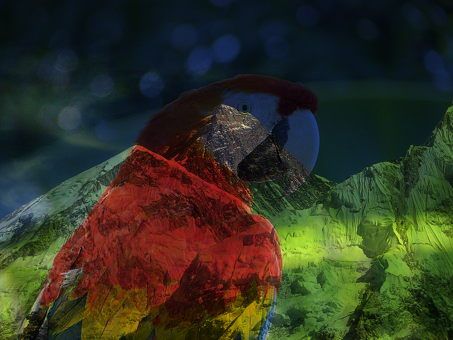

In [110]:
im1 = Image.open("../images/parrot.png")
im2 = Image.open("../images/hill.png").convert('RGB').resize((im1.width, im1.height))
display(multiply(im1, im2))

### Adding two images

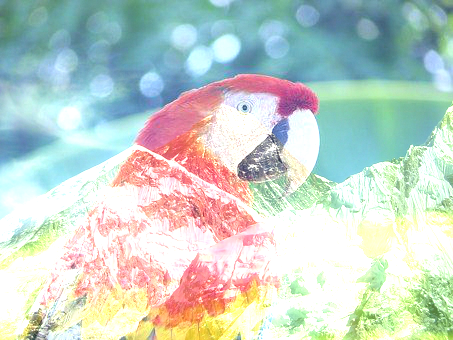

In [111]:
display(add(im1, im2))

### Computing the difference between two images

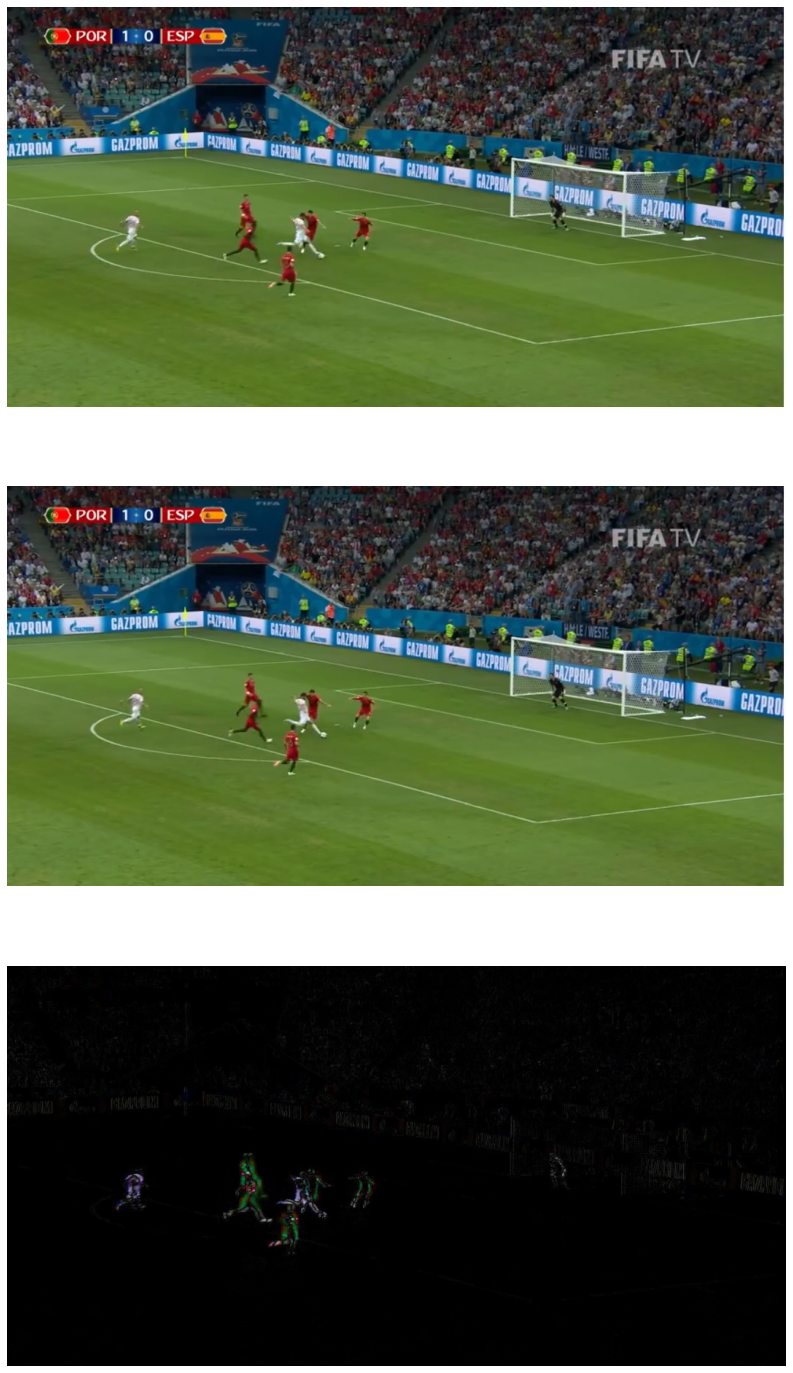

In [112]:
from PIL.ImageChops import subtract, multiply, screen, difference, add
im1 = Image.open("../images/goal1.png") # load two consecutive frame images from the video
im2 = Image.open("../images/goal2.png")
im = difference(im1, im2)
plt.figure(figsize=(20,25))
im.save("../images/goal_diff.png")
plt.subplot(311)
plt.imshow(im1)
plt.axis('off')
plt.subplot(312)
plt.imshow(im2)
plt.axis('off')
plt.subplot(313)
plt.imshow(im), plt.axis('off')
plt.show()